# PARKINSON'S DISEASE ANALYSIS AND CLASSIFICATION

Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving datasets_410614_786211_parkinsons.csv to datasets_410614_786211_parkinsons (1).csv


In [4]:
# we store the csv file in a dataframe
df= pd.read_csv('datasets_410614_786211_parkinsons.csv')
df[:5]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Attribute Information:

* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),
* MDVP:Jitter(Abs),
* MDVP:RAP,MDVP:PPQ,
* Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),
* Shimmer:APQ3,
* Shimmer:APQ5,
* MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
spread1,spread2,
* PPE - Three nonlinear measures of fundamental frequency
variation 9. 
* car name: string (unique for each instance)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

There are 195 observations and 24 features in the dataframe

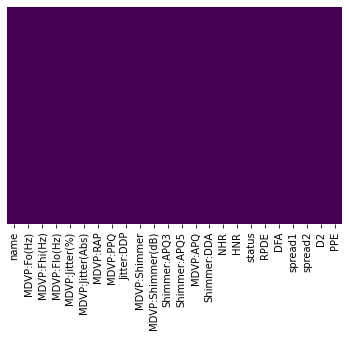

In [6]:
# We check whether there are any missing values present in the data
sns.heatmap(df.isna(), yticklabels= False, cbar= False, cmap= 'viridis')

We see that there are no missing values present in the dataframe

# EDA

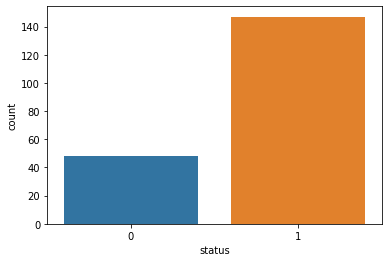

In [13]:
# We shall see the distribution of target variable status
sns.countplot(x= 'status', data= df)

* We see that there are more number of patients who has been tested positive for Parkinson's disease

In [14]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Text(0.5, 1.0, 'Status vs Average Vocal Fundamental Frequency')

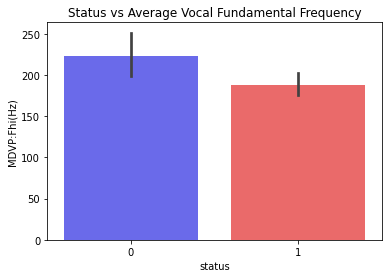

In [20]:
# We shall see how the average vocal fundamental frequnecy are distributed
sns.barplot(x='status', y='MDVP:Fhi(Hz)', data=df, palette= 'seismic')
plt.title('Status vs Average Vocal Fundamental Frequency')

* it is clear that the patients having less vocal frequency are tend to have Parkinson's disease

Text(0.5, 1.0, 'Status vs Noise to Tonal Ratio')

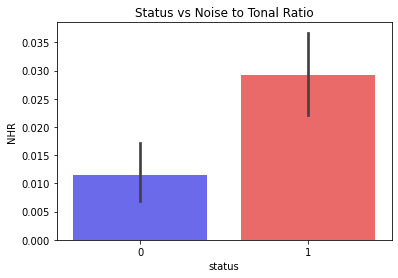

In [27]:
# Visulaisation of NHR, a measure of ratio of noise to tonal components of voice vs the Status of the patient
sns.barplot(x='status', y='NHR', data=df, palette= 'seismic')
plt.title('Status vs Noise to Tonal Ratio')

* From the viz, we see that the patients who are having more NHR value (or) having more noise component in the numerator of the ratio (or) having less tonal component in the ratio are tend to be affected by Parkinson's disease

Text(0.5, 1.0, 'Status vs MDVP Shimmer in dB')

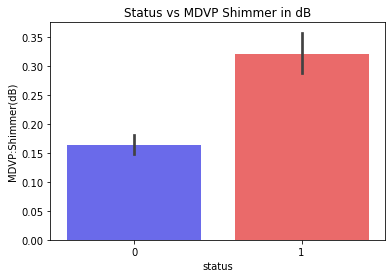

In [28]:
sns.barplot(x='status', y='MDVP:Shimmer(dB)', data=df, palette= 'seismic')
plt.title('Status vs MDVP Shimmer in dB')

* This tells us that patients who have higher decibals of Shimmer are tend to have Parkinson's disease

Text(0.5, 1.0, 'Distribution of DFA- Signal Fractional Scaling')

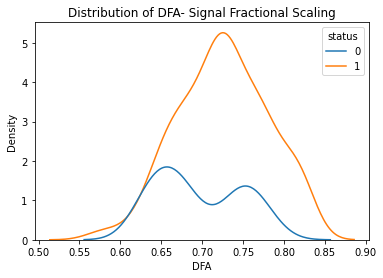

In [52]:
sns.kdeplot(x='DFA', hue='status',data= df)
plt.title('Distribution of DFA- Signal Fractional Scaling')

* Pateints having parkinson's disease are found to be have more density in Signal Fractional Scaling test- DFA

Text(0.5, 1.0, 'Distribution of PPE')

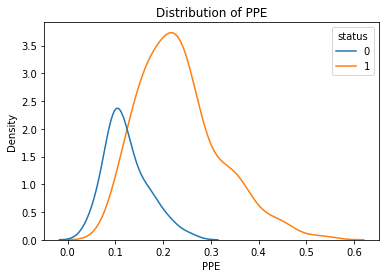

In [33]:
sns.kdeplot(x= 'PPE', data= df, hue= 'status')
plt.title('Distribution of PPE')

* from this distribution plot it's clear that patients with higher density are tend to be positive for Parkinson's disease

In [54]:
# We see the correlation of the data 
df.corr()[:5]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162


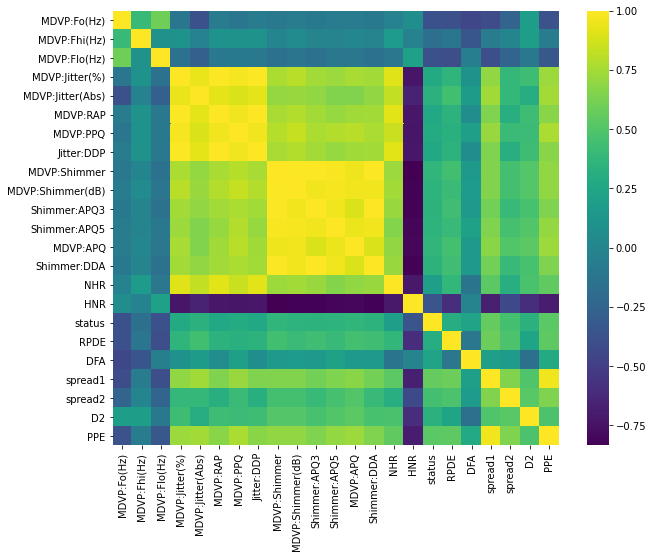

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap= 'viridis')

# SUPERVISED LEARNING

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [55]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [58]:
# Creating feature matrix
# We leave out the target variable & categorical features since our machine learning lagorithms can't make out anything of categorical values
X = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
X[:5]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

* we have our feature matrix X which only contains numerical values in it

In [60]:
# Creating target variable y
y = df['status']
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [61]:
# we split the data into training and testing test of the ratio 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)

*Standard Classification Algorithms*

* KNN
* Logistic Regression
* Decision Trees

* K Nearest Neighbour Algorithm

In [62]:
# Scaling the data since KNN evalutes based upon the Eucleadean Distance between the points
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled_features = scaler.transform(X)
scaled_features[:5]

array([[-0.82929965, -0.43616456, -0.95203729,  0.33491386,  0.74975946,
         0.13296255,  0.76080023,  0.13175532,  0.74598495,  0.73953578,
         0.60785907,  1.11914677,  0.33298451,  0.60753214, -0.06789281,
        -0.19322537, -0.8078385 ,  1.76081412,  0.80132308,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056,  0.71541825,  1.03767418,
         0.45389169,  1.27680862,  0.45268371,  1.68173116,  1.7684643 ,
         1.54791153,  2.27650439,  1.15945391,  1.54825419, -0.13784252,
        -0.63450828, -0.38752443,  1.83756192,  1.47985265,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483,  0.88499086,  1.3255889 ,
         0.72076961,  1.58568688,  0.72181312,  1.2026929 ,  1.02763576,
         1.17564285,  1.72617584,  0.69918677,  1.17532274, -0.29163266,
        -0.27976031, -0.66207509,  1.94204837,  1.14144541,  1.01768236,
        -0.10362861,  1.40266141],
       [-0.90962172

In [67]:
df_knn = pd.DataFrame(scaled_features, columns= [['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']])
df_knn[:5]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [71]:
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_knn,y,test_size= 0.3, random_state = 42)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)   # 1st we see how the model performs for 1 neighbor

In [74]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [75]:
pred_knn = knn.predict(X_test_knn)
pred_knn[:5]

array([1, 1, 1, 1, 1])

In [76]:
y_test_knn[:5]

138    1
16     1
155    1
96     1
68     1
Name: status, dtype: int64

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_knn, pred_knn))
print("\n")
print(classification_report(y_test_knn, pred_knn))

[[15  0]
 [ 2 42]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.95      0.98        44

    accuracy                           0.97        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.97      0.97      0.97        59



We see that we have attained 97% accuracy for k=1, but we can find best k value and maximise acuuracy as possible

In [78]:
error_rate = []
for i in range(1,40):
  knn_i = KNeighborsClassifier(n_neighbors=i)
  knn_i.fit(X_train_knn, y_train_knn)
  pred_i = knn_i.predict(X_test_knn)
  error_rate.append(np.mean(pred_i != y_test_knn))

Text(0, 0.5, 'Error rate')

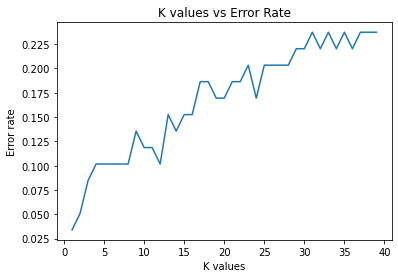

In [80]:
sns.lineplot(x=range(1,40), y=error_rate)
plt.title('K values vs Error Rate')
plt.xlabel('K values')
plt.ylabel('Error rate')

We see that, at k=1 the error rate is low, so the model we built at the beginning is the most accurate KNN model we can build

In [81]:
print(confusion_matrix(y_test_knn, pred_knn))
print("\n")
print(classification_report(y_test_knn, pred_knn))

[[15  0]
 [ 2 42]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.95      0.98        44

    accuracy                           0.97        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.97      0.97      0.97        59



* Out of 15 values of not having parkinson's disease, our model has predicted all 15 cases as not having parkinson's giving a F1 score of 0.94
* Out of 44 cases of having Parkinson's disease, our model was able to predict 42 of the cases correctly and 2 of them have been predicted wrong(FP) giving an F1 score of 0.98

In [90]:
knn_accuracy = 0.97 # So we store the accuracy value here, so we can compare it with other classification models
print("The accuracy recorded in KNN model: ", knn_accuracy*100, "%")

The accuracy recorded in KNN model:  97.0 %


* Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()   # intializing the Logistic regreesion classifier

In [85]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
pred_lr = lr_model.predict(X_test)
pred_lr[:5]

array([1, 1, 1, 1, 1])

In [87]:
y_test[:5]

138    1
16     1
155    1
96     1
68     1
Name: status, dtype: int64

In [88]:
print(confusion_matrix(y_test_knn, pred_lr))
print("\n")
print(classification_report(y_test_knn, pred_lr))

[[ 9  6]
 [ 3 41]]


              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.87      0.93      0.90        44

    accuracy                           0.85        59
   macro avg       0.81      0.77      0.78        59
weighted avg       0.84      0.85      0.84        59



* Out of 15 values of not having parkinson's disease, our model has predicted 9 cases as not having parkinson's and 6 of them have been predcited wrongly giving a F1 score of 0.67
* Out of 44 cases of having Parkinson's disease, our model was able to predict 41 of the cases correctly and 3 of them have been predicted wrong(FP) giving an F1 score of 0.90

In [97]:
lr_accuracy = 0.85
# So we store the accuracy value here, so we can compare it with other classification models
print("The accuracy recorded in Logistic Regression model: ", lr_accuracy*100, "%")

The accuracy recorded in Logistic Regression model:  85.0 %


* Decision trees

In [92]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()   # Intializing the model

In [93]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
pred_tree = model_tree.predict(X_test)
pred_tree[:5]

array([1, 1, 1, 1, 1])

In [95]:
y_test[:5]

138    1
16     1
155    1
96     1
68     1
Name: status, dtype: int64

In [96]:
print(confusion_matrix(y_test_knn, pred_tree))
print("\n")
print(classification_report(y_test_knn, pred_tree))

[[11  4]
 [ 3 41]]


              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



* Out of 15 values of not having parkinson's disease, our model has predicted 11 cases as not having parkinson's and 4 of them have been predcited wrongly giving a F1 score of 0.76
* Out of 44 cases of having Parkinson's disease, our model was able to predict 41 of the cases correctly and 3 of them have been predicted wrong(FP) giving an F1 score of 0.92

In [99]:
tree_accuracy = 0.88
# So we store the accuracy value here, so we can compare it with other classification models
print("The accuracy recorded in Decision tree model: ", tree_accuracy*100, "%")

The accuracy recorded in Decision tree model:  88.0 %


*Ensemble Model*

* Random Forest Algorithm

In [110]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators=100)  # intialising the model

In [111]:
model_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
pred_forest = model_forest.predict(X_test)
pred_forest[:5]

array([1, 1, 1, 1, 1])

In [113]:
y_test[:5]

138    1
16     1
155    1
96     1
68     1
Name: status, dtype: int64

In [114]:
print(confusion_matrix(y_test_knn, pred_forest))
print("\n")
print(classification_report(y_test_knn, pred_forest))

[[12  3]
 [ 0 44]]


              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59



* Out of 15 values of not having parkinson's disease, our model has predicted 12 cases as not having parkinson's and 3 of them have been predicted wrongly giving a F1 score of 0.89
* Out of 44 cases of having Parkinson's disease, our model was able to predict all 44 cases correctly gicing an F1 score of 0.97

In [115]:
forest_accuracy = 0.95
# So we store the accuracy value here, so we can compare it with other classification models
print("The accuracy recorded in Random Forest model: ", forest_accuracy*100, "%")

The accuracy recorded in Random Forest model:  95.0 %


# Comparing all the models and choosing the best one

In [116]:
print("The accuracy recorded in KNN model: ", knn_accuracy*100, "%")
print("The accuracy recorded in Logistic Regression model: ", lr_accuracy*100, "%")
print("The accuracy recorded in Decision tree model: ", tree_accuracy*100, "%")
print("The accuracy recorded in Random Forest model: ", forest_accuracy*100, "%")

The accuracy recorded in KNN model:  97.0 %
The accuracy recorded in Logistic Regression model:  85.0 %
The accuracy recorded in Decision tree model:  88.0 %
The accuracy recorded in Random Forest model:  95.0 %


* From the above cell, it's clear that K Nearest Neighbor algorithm has worked well with the data we provided giving an accuracy of 97%
* the next best is to use Random Forest Classifier giving an accuracy of 95%